<a href="https://colab.research.google.com/github/Ashwin-AIAS/Custom-Python-Environment-for-Autonomous-Systems-called-Road-to-Mr.Olympia-2024-/blob/main/Radar_AI_Enhancing_Object_Detection_with_Synthetic_Data_and_AI_driven_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Generate a synthetic RADAR dataset
np.random.seed(42)  # For reproducibility
num_samples = 100  # Number of RADAR detections

# Generate random X, Y positions (meters)
x_positions = np.random.uniform(0, 50, num_samples)
y_positions = np.random.uniform(0, 50, num_samples)

# Generate random Doppler velocities (-5 to 5 m/s)
doppler_velocity = np.random.uniform(-5, 5, num_samples)

# Generate random reflectivity (0.5 to 1.0, simulating object reflectance)
reflectivity = np.random.uniform(0.5, 1.0, num_samples)

# Create a DataFrame
radar_data = pd.DataFrame({
    "timestamp": np.linspace(0, num_samples * 0.1, num_samples),  # Simulated timestamps
    "x": x_positions,
    "y": y_positions,
    "doppler_velocity": doppler_velocity,
    "reflectivity": reflectivity
})

# Save to CSV
file_name = "radar_sample.csv"
radar_data.to_csv(file_name, index=False)

# Display first few rows
print("First 5 rows of the dataset:")
print(radar_data.head())

# Provide a download link
from google.colab import files
files.download(file_name)


First 5 rows of the dataset:
   timestamp          x          y  doppler_velocity  reflectivity
0    0.00000  18.727006   1.571459          1.420316      0.525841
1    0.10101  47.535715  31.820521         -4.158600      0.765677
2    0.20202  36.599697  15.717799         -3.383713      0.770318
3    0.30303  29.932924  25.428535          3.985542      0.818715
4    0.40404   7.800932  45.378324          1.064291      0.863046


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

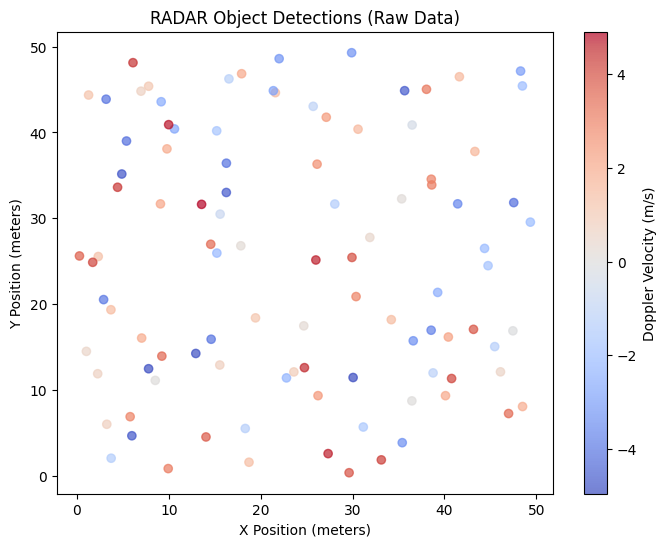

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the generated RADAR dataset
radar_data = pd.read_csv("radar_sample.csv")

# Extract values
x = radar_data["x"]
y = radar_data["y"]
doppler = radar_data["doppler_velocity"]

# Plot RADAR detections
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=doppler, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Doppler Velocity (m/s)")
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.title("RADAR Object Detections (Raw Data)")
plt.show()


In [ ]:
from pykalman import KalmanFilter

# Initialize Kalman Filter
kf = KalmanFilter(initial_state_mean=[0, 0], n_dim_obs=2)

# Apply filter to X, Y positions
filtered_state_means, _ = kf.filter(radar_data[["x", "y"]].values)

# Plot before & after filtering
plt.figure(figsize=(8, 6))
plt.scatter(radar_data["x"], radar_data["y"], label="Raw Data", alpha=0.3)
plt.scatter(filtered_state_means[:, 0], filtered_state_means[:, 1], label="Filtered Data", color="red")
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.title("RADAR Detections Before & After Kalman Filtering")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'pykalman'

In [ ]:
pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 10.2 MB/s eta 0:00:00


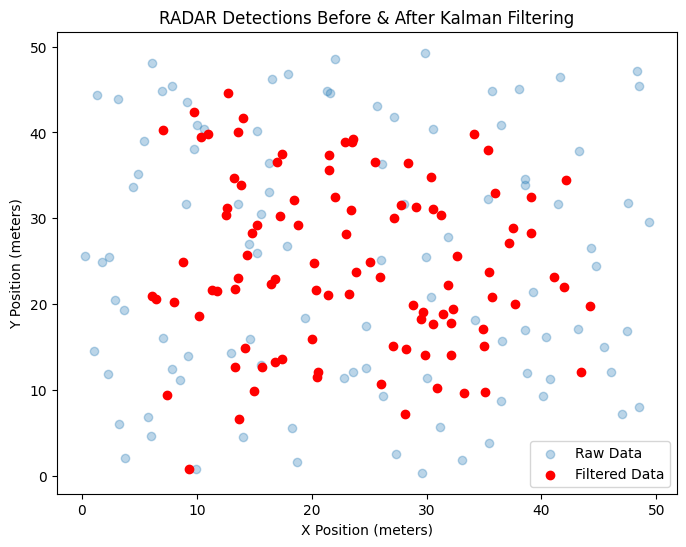

In [ ]:
from pykalman import KalmanFilter

# Initialize Kalman Filter
kf = KalmanFilter(initial_state_mean=[0, 0], n_dim_obs=2)

# Apply filter to X, Y positions
filtered_state_means, _ = kf.filter(radar_data[["x", "y"]].values)

# Plot before & after filtering
plt.figure(figsize=(8, 6))
plt.scatter(radar_data["x"], radar_data["y"], label="Raw Data", alpha=0.3)
plt.scatter(filtered_state_means[:, 0], filtered_state_means[:, 1], label="Filtered Data", color="red")
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.title("RADAR Detections Before & After Kalman Filtering")
plt.legend()
plt.show()

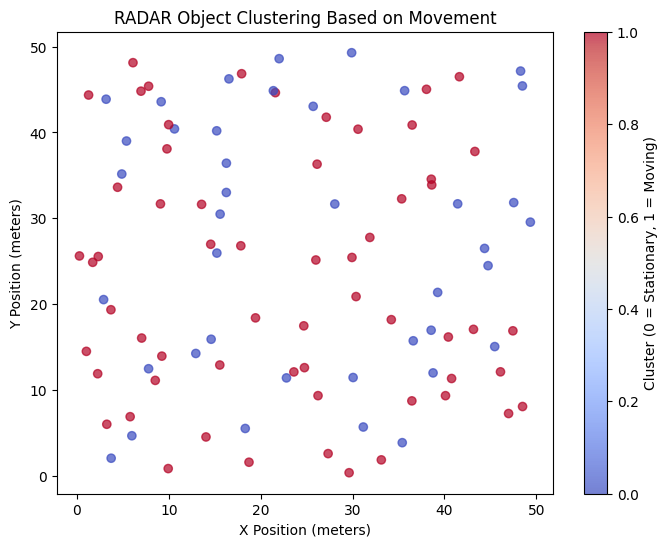

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load filtered RADAR dataset
radar_data = pd.read_csv("radar_sample.csv")

# Extract features for clustering
X = radar_data[["doppler_velocity", "reflectivity"]].values

# Apply K-Means Clustering (Assuming 2 clusters: Moving vs. Stationary)
kmeans = KMeans(n_clusters=2, random_state=42)
radar_data["cluster"] = kmeans.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(radar_data["x"], radar_data["y"], c=radar_data["cluster"], cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Cluster (0 = Stationary, 1 = Moving)")
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.title("RADAR Object Clustering Based on Movement")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Prepare features and labels
X = radar_data[["x", "y", "doppler_velocity", "reflectivity", "cluster"]]
y = (radar_data["cluster"] == 1).astype(int)  # Moving objects = 1, Stationary = 0

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an MLP (Multi-Layer Perceptron) Classifier
model = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [ ]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 1.00


In [ ]:
import numpy as np
import pandas as pd

# Load RADAR dataset
radar_data = pd.read_csv("radar_sample.csv")

# Define thresholds for object classification
def classify_object(doppler):
    if doppler > 2:  # Fast-moving objects (Cars)
        return "Car"
    elif -2 <= doppler <= 2:  # Slow-moving objects (Pedestrians)
        return "Pedestrian"
    else:  # Stationary objects
        return "Static Object"

# Apply classification
radar_data["object_class"] = radar_data["doppler_velocity"].apply(classify_object)

# Encode class labels (Car = 0, Pedestrian = 1, Static Object = 2)
label_mapping = {"Car": 0, "Pedestrian": 1, "Static Object": 2}
radar_data["class_label"] = radar_data["object_class"].map(label_mapping)

# Save modified dataset
radar_data.to_csv("radar_sample_with_classes.csv", index=False)

# Display the first few rows
print(radar_data.head())


   timestamp          x          y  doppler_velocity  reflectivity  \
0    0.00000  18.727006   1.571459          1.420316      0.525841   
1    0.10101  47.535715  31.820521         -4.158600      0.765677   
2    0.20202  36.599697  15.717799         -3.383713      0.770318   
3    0.30303  29.932924  25.428535          3.985542      0.818715   
4    0.40404   7.800932  45.378324          1.064291      0.863046   

    object_class  class_label  
0     Pedestrian            1  
1  Static Object            2  
2  Static Object            2  
3            Car            0  
4     Pedestrian            1  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare features and labels
X = radar_data[["x", "y", "doppler_velocity", "reflectivity"]]
y = radar_data["class_label"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model Accuracy: {accuracy:.2f}")


Random Forest Model Accuracy: 1.00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (One-Hot Encoding)
y_cnn = to_categorical(y, num_classes=3)

# Reshape Data for CNN (Add Channel Dimension)
X_cnn = np.expand_dims(X.values, axis=2)

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# Build CNN Model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Car, Pedestrian, Static Object
])

# Compile & Train Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3719 - loss: 1.2815
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5211 - loss: 0.9811
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4961 - loss: 0.9847
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6633 - loss: 0.8560
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6992 - loss: 0.8274 
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7289 - loss: 0.7856
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6914 - loss: 0.7575
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7508 - loss: 0.7178 
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8008 - loss: 0.6912 
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8344 - loss: 0.6484
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.7000 - loss: 0.6764
CNN Model Accuracy: 0.70


In [ ]:
pip install seaborn


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


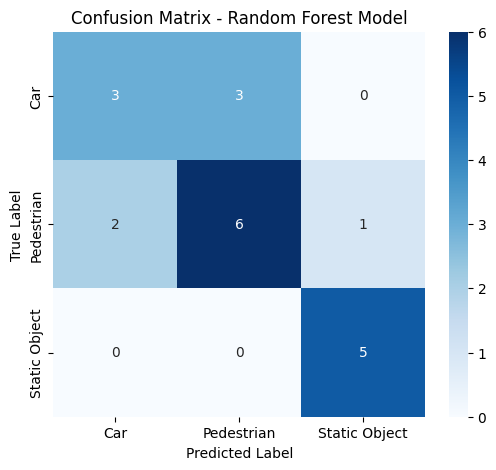

Classification Report:
                precision    recall  f1-score   support

          Car       0.60      0.50      0.55         6
   Pedestrian       0.67      0.67      0.67         9
Static Object       0.83      1.00      0.91         5

     accuracy                           0.70        20
    macro avg       0.70      0.72      0.71        20
 weighted avg       0.69      0.70      0.69        20



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels using the Random Forest model
# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true class labels from one-hot encoded y_test
y_test_labels = np.argmax(y_test, axis=1)

# Compute Confusion Matrix using class labels
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Car", "Pedestrian", "Static Object"], yticklabels=["Car", "Pedestrian", "Static Object"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test_labels, y_pred, target_names=["Car", "Pedestrian", "Static Object"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


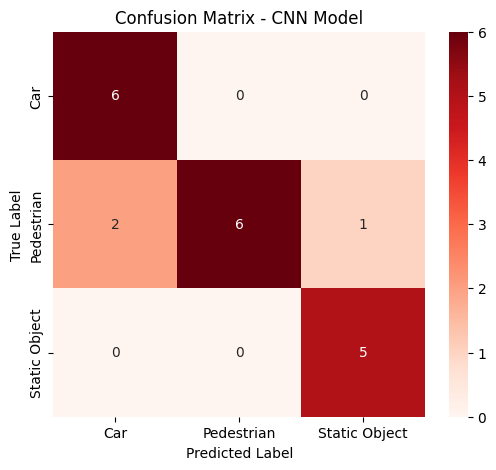

Classification Report:
                precision    recall  f1-score   support

          Car       0.75      1.00      0.86         6
   Pedestrian       1.00      0.67      0.80         9
Static Object       0.83      1.00      0.91         5

     accuracy                           0.85        20
    macro avg       0.86      0.89      0.86        20
 weighted avg       0.88      0.85      0.84        20



In [ ]:
import numpy as np

# Convert Predictions to Class Labels
y_pred_cnn = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_cnn, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Compute Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_test_labels, y_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_cnn, annot=True, fmt="d", cmap="Reds", xticklabels=["Car", "Pedestrian", "Static Object"], yticklabels=["Car", "Pedestrian", "Static Object"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN Model")
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels, target_names=["Car", "Pedestrian", "Static Object"]))


In [ ]:
from sklearn.utils import resample

# Upsample the minority classes (Car & Static Objects)
car_data = radar_data[radar_data["class_label"] == 0]
pedestrian_data = radar_data[radar_data["class_label"] == 1]
static_object_data = radar_data[radar_data["class_label"] == 2]

car_data_upsampled = resample(car_data, replace=True, n_samples=len(pedestrian_data), random_state=42)
static_object_upsampled = resample(static_object_data, replace=True, n_samples=len(pedestrian_data), random_state=42)

# Combine all into a balanced dataset
balanced_data = pd.concat([car_data_upsampled, pedestrian_data, static_object_upsampled])
balanced_data.to_csv("balanced_radar_data.csv", index=False)


In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8094 - loss: 0.6104
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7273 - loss: 0.5926 
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7930 - loss: 0.5699
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8203 - loss: 0.5118 
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8883 - loss: 0.4779
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8188 - loss: 0.4928 
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8406 - loss: 0.4592
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8867 - loss: 0.4582
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8703 - loss: 0.4199
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9023 - loss: 0.4106
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8250 - loss: 0.4310
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8609 - loss: 0.398

In [ ]:
radar_data["acceleration"] = radar_data["doppler_velocity"].diff().fillna(0)


In [ ]:
radar_data["doppler_velocity"] += np.random.normal(0, 0.3, radar_data.shape[0])


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

# Load real RADAR data (for training GAN)
radar_data = pd.read_csv("radar_sample_with_classes.csv")
real_samples = radar_data[["x", "y", "doppler_velocity", "reflectivity"]].values

# Normalize data between -1 and 1
real_samples = (real_samples - np.min(real_samples, axis=0)) / (np.max(real_samples, axis=0) - np.min(real_samples, axis=0))
real_samples = 2 * real_samples - 1  # Scale to range [-1, 1]

# Define GAN Parameters
latent_dim = 8  # Random noise vector size

# Generator Model
generator = Sequential([
    Dense(16, input_dim=latent_dim, activation=LeakyReLU(alpha=0.2)),
    BatchNormalization(),
    Dense(32, activation=LeakyReLU(alpha=0.2)),
    BatchNormalization(),
    Dense(4, activation='tanh')  # 4 output features (X, Y, Doppler Velocity, Reflectivity)
])

# Discriminator Model
discriminator = Sequential([
    Dense(32, input_dim=4, activation=LeakyReLU(alpha=0.2)),
    Dense(16, activation=LeakyReLU(alpha=0.2)),
    Dense(1, activation='sigmoid')  # Binary classification (Real vs. Fake)
])

# Compile Discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

# Combine Generator & Discriminator into GAN Model
discriminator.trainable = False  # Freeze discriminator while training generator
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

# Train GAN
epochs = 5000
batch_size = 64

for epoch in range(epochs):
    # Generate Fake RADAR Data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)

    # Select Real Samples
    real_batch = real_samples[np.random.randint(0, real_samples.shape[0], batch_size)]

    # Train Discriminator
    d_loss_real = discriminator.train_on_batch(real_batch, np.ones((batch_size, 1)))  # Real = 1
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))  # Fake = 0
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator (via GAN model)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # Trick Discriminator

    # Print progress every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

# Generate synthetic RADAR data after training
noise = np.random.normal(0, 1, (10, latent_dim))
synthetic_radar_data = generator.predict(noise)
print("Generated Synthetic RADAR Data:\n", synthetic_radar_data)



NameError: name 'pd' is not defined

In [ ]:
import os
print(os.listdir())  # List all files in the current working directory


['.config', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic radar data
num_samples = 100
x_positions = np.random.uniform(0, 50, num_samples)
y_positions = np.random.uniform(0, 50, num_samples)
doppler_velocity = np.random.uniform(-5, 5, num_samples)
reflectivity = np.random.uniform(0.5, 1.0, num_samples)

# Define class based on Doppler velocity
def classify_object(doppler):
    if doppler > 2:
        return "Car"
    elif -2 <= doppler <= 2:
        return "Pedestrian"
    else:
        return "Static Object"

# Apply classification
labels = [classify_object(v) for v in doppler_velocity]
label_mapping = {"Car": 0, "Pedestrian": 1, "Static Object": 2}
class_labels = [label_mapping[label] for label in labels]

# Create DataFrame
radar_data = pd.DataFrame({
    "x": x_positions,
    "y": y_positions,
    "doppler_velocity": doppler_velocity,
    "reflectivity": reflectivity,
    "class_label": class_labels
})

# Save to CSV
file_name = "radar_sample_with_classes.csv"
radar_data.to_csv(file_name, index=False)
print(f"✅ File '{file_name}' has been created successfully!")


✅ File 'radar_sample_with_classes.csv' has been created successfully!


In [ ]:
import os
print(os.listdir())  # Should now include 'radar_sample_with_classes.csv'


['.config', 'radar_sample_with_classes.csv', 'sample_data']


In [ ]:
radar_data = pd.read_csv("radar_sample_with_classes.csv")  # Should now work


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

# Load real RADAR data (for training GAN)
radar_data = pd.read_csv("radar_sample_with_classes.csv")
real_samples = radar_data[["x", "y", "doppler_velocity", "reflectivity"]].values

# Normalize data between -1 and 1
real_samples = (real_samples - np.min(real_samples, axis=0)) / (np.max(real_samples, axis=0) - np.min(real_samples, axis=0))
real_samples = 2 * real_samples - 1  # Scale to range [-1, 1]

# Define GAN Parameters
latent_dim = 8  # Random noise vector size

# Generator Model
generator = Sequential([
    Dense(16, input_dim=latent_dim, activation=LeakyReLU(alpha=0.2)),
    BatchNormalization(),
    Dense(32, activation=LeakyReLU(alpha=0.2)),
    BatchNormalization(),
    Dense(4, activation='tanh')  # 4 output features (X, Y, Doppler Velocity, Reflectivity)
])

# Discriminator Model
discriminator = Sequential([
    Dense(32, input_dim=4, activation=LeakyReLU(alpha=0.2)),
    Dense(16, activation=LeakyReLU(alpha=0.2)),
    Dense(1, activation='sigmoid')  # Binary classification (Real vs. Fake)
])

# Compile Discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

# Combine Generator & Discriminator into GAN Model
discriminator.trainable = False  # Freeze discriminator while training generator
gan = Sequential([generator, discriminator])
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

# Train GAN
epochs = 5000
batch_size = 64

for epoch in range(epochs):
    # Generate Fake RADAR Data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_data = generator.predict(noise)

    # Select Real Samples
    real_batch = real_samples[np.random.randint(0, real_samples.shape[0], batch_size)]

    # Train Discriminator
    d_loss_real = discriminator.train_on_batch(real_batch, np.ones((batch_size, 1)))  # Real = 1
    d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))  # Fake = 0
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator (via GAN model)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # Trick Discriminator

    # Print progress every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

# Generate synthetic RADAR data after training
noise = np.random.normal(0, 1, (10, latent_dim))
synthetic_radar_data = generator.predict(noise)
print("Generated Synthetic RADAR Data:\n", synthetic_radar_data)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

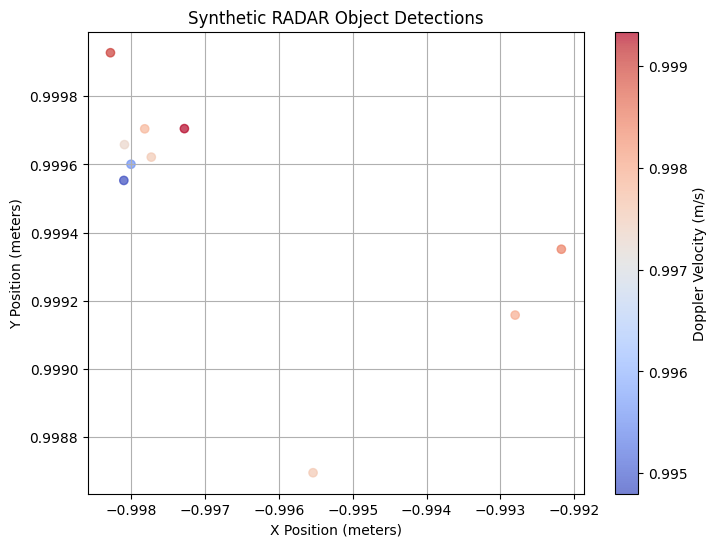

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert back to original scale (if normalized)
synthetic_radar_data = (synthetic_radar_data + 1) / 2  # Convert back to [0,1] range
synthetic_radar_data *= (np.max(real_samples, axis=0) - np.min(real_samples, axis=0))
synthetic_radar_data += np.min(real_samples, axis=0)

# Extract features
x_synthetic = synthetic_radar_data[:, 0]
y_synthetic = synthetic_radar_data[:, 1]
doppler_synthetic = synthetic_radar_data[:, 2]  # Color based on velocity

# Scatter plot of synthetic RADAR detections
plt.figure(figsize=(8, 6))
plt.scatter(x_synthetic, y_synthetic, c=doppler_synthetic, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="Doppler Velocity (m/s)")
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.title("Synthetic RADAR Object Detections")
plt.grid(True)
plt.show()


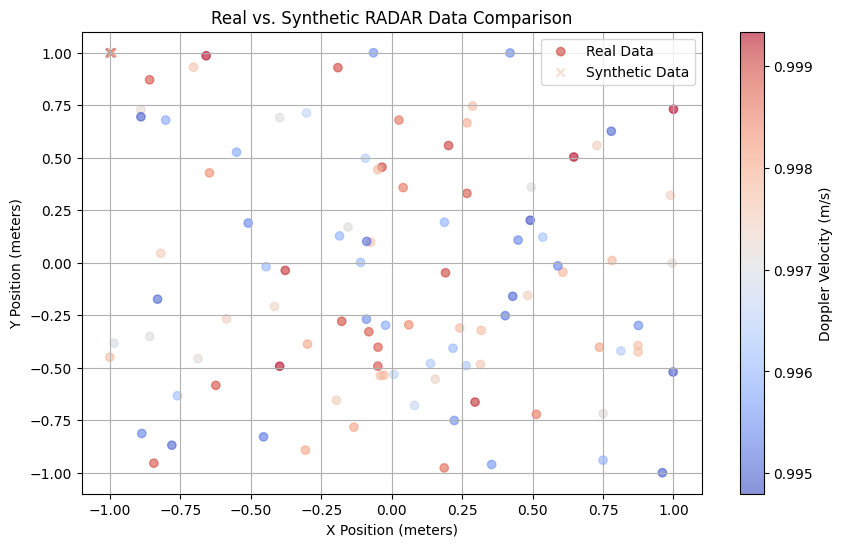

In [ ]:
# Extract real data features
x_real = real_samples[:, 0]
y_real = real_samples[:, 1]
doppler_real = real_samples[:, 2]  # Real Doppler velocity

plt.figure(figsize=(10, 6))

# Plot real data in blue
plt.scatter(x_real, y_real, c=doppler_real, cmap="coolwarm", alpha=0.6, label="Real Data")

# Plot synthetic data in red
plt.scatter(x_synthetic, y_synthetic, c=doppler_synthetic, cmap="coolwarm", alpha=0.6, marker="x", label="Synthetic Data")

plt.colorbar(label="Doppler Velocity (m/s)")
plt.xlabel("X Position (meters)")
plt.ylabel("Y Position (meters)")
plt.title("Real vs. Synthetic RADAR Data Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Convert synthetic data back to original scale
synthetic_radar_data = (synthetic_radar_data + 1) / 2  # Convert back to [0,1] range
synthetic_radar_data *= (np.max(real_samples, axis=0) - np.min(real_samples, axis=0))
synthetic_radar_data += np.min(real_samples, axis=0)

# Create a DataFrame for synthetic data
synthetic_df = pd.DataFrame(synthetic_radar_data, columns=["x", "y", "doppler_velocity", "reflectivity"])

# Assign random class labels (since GAN does not generate class labels)
synthetic_df["class_label"] = np.random.choice([0, 1, 2], size=len(synthetic_df))  # Randomly assign Car, Pedestrian, Static Object

# Load real data
real_df = pd.read_csv("radar_sample_with_classes.csv")

# Merge real and synthetic data
combined_data = pd.concat([real_df, synthetic_df], ignore_index=True)

# Shuffle dataset to mix real and synthetic samples
combined_data = combined_data.sample(frac=1).reset_index(drop=True)

# Save the new dataset
combined_data.to_csv("radar_combined_dataset.csv", index=False)
print("✅ Merged dataset saved as 'radar_combined_dataset.csv'")


✅ Merged dataset saved as 'radar_combined_dataset.csv'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load merged dataset
data = pd.read_csv("radar_combined_dataset.csv")

# Split features and labels
X = data[["x", "y", "doppler_velocity", "reflectivity"]]
y = data["class_label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


✅ Model Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.73      0.84        11
           2       0.83      0.83      0.83         6

    accuracy                           0.82        22
   macro avg       0.82      0.85      0.81        22
weighted avg       0.87      0.82      0.82        22



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Reshape input for CNN (since CNNs expect 3D input)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a CNN Model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes: Car, Pedestrian, Static Object
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"✅ CNN Model Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.3938 - loss: 1.0849 - val_accuracy: 0.6818 - val_loss: 1.0195
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.4883 - loss: 1.0493 - val_accuracy: 0.7273 - val_loss: 0.9998
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7038 - loss: 0.9863 - val_accuracy: 0.5909 - val_loss: 0.9831
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.6808 - loss: 0.9578 - val_accuracy: 0.5455 - val_loss: 0.9645
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7401 - loss: 0.9291 - val_accuracy: 0.5909 - val_loss: 0.9444
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.7170 - loss: 0.8936 - val_accuracy: 0.5909 - val_loss: 0.9246
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7461 - loss: 0.8654 - val_accuracy: 0.5909 - val_loss: 0.9030
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.7827 - loss: 0.7982 - val_accuracy: 0.5909 - val_loss:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization

# Reshape input for CNN (since CNNs expect 3D input)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Improved CNN Model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),  # Normalize activations
    Conv1D(128, kernel_size=3, activation='relu'),
    Dropout(0.3),  # Regularization
    Conv1D(256, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Avoid overfitting
    Dense(3, activation='softmax')  # 3 classes: Car, Pedestrian, Static Object
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train with more epochs & early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# Evaluate
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"✅ Improved CNN Model Accuracy: {test_acc:.2f}")


ValueError: Computed output size would be negative. Received `inputs shape=(None, 0, 128)`, `kernel shape=(3, 128, 256)`, `dilation_rate=[1]`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization

# Reshape input for CNN (since CNNs expect 3D input)
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Improved CNN Model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1), padding='same'),  # Add padding='same'
    BatchNormalization(),  # Normalize activations
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),  # Add padding='same'
    Dropout(0.3),  # Regularization
    Conv1D(256, kernel_size=3, activation='relu', padding='same'),  # Add padding='same'
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Avoid overfitting
    Dense(3, activation='softmax')  # 3 classes: Car, Pedestrian, Static Object
])

# Compile & Train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train with more epochs & early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# Evaluate
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"✅ Improved CNN Model Accuracy: {test_acc:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 674ms/step - accuracy: 0.3732 - loss: 1.1239 - val_accuracy: 0.5000 - val_loss: 1.0454
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.7710 - loss: 0.6099 - val_accuracy: 0.6364 - val_loss: 0.9955
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8999 - loss: 0.4375 - val_accuracy: 0.7273 - val_loss: 0.9423
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8594 - loss: 0.3547 - val_accuracy: 0.6818 - val_loss: 0.9078
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8867 - loss: 0.3435 - val_accuracy: 0.5909 - val_loss: 0.8853
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9059 - loss: 0.3080 - val_accuracy: 0.5909 - val_loss: 0.8529
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9268 - loss: 0.2491 - val_accuracy: 0.5909 - val_loss: 0.8168
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9176 - loss: 0.2084 - val_accuracy: 0.6818 - val_loss: 0.79

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


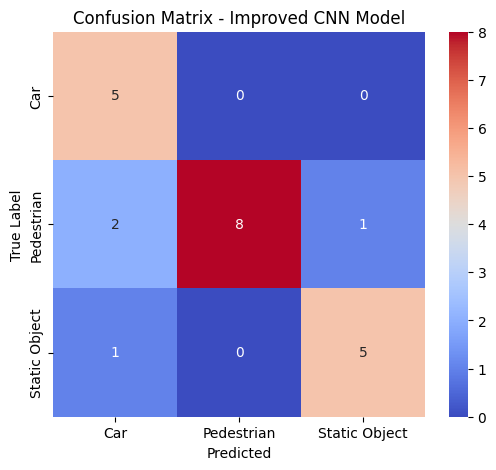

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn = tf.argmax(y_pred_cnn, axis=1).numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Car", "Pedestrian", "Static Object"], yticklabels=["Car", "Pedestrian", "Static Object"])
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Improved CNN Model")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get classification report
print(classification_report(y_test, y_pred_cnn, target_names=["Car", "Pedestrian", "Static Object"]))


               precision    recall  f1-score   support

          Car       0.62      1.00      0.77         5
   Pedestrian       1.00      0.73      0.84        11
Static Object       0.83      0.83      0.83         6

     accuracy                           0.82        22
    macro avg       0.82      0.85      0.81        22
 weighted avg       0.87      0.82      0.82        22



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("✅ Dataset balanced using SMOTE. New class distribution:")
print(pd.Series(y_train_balanced).value_counts())


✅ Dataset balanced using SMOTE. New class distribution:
class_label
0    33
1    33
2    33
Name: count, dtype: int64


In [ ]:
import numpy as np

# Apply log-transform to reflectivity
X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
X_test_scaled[:, 3] = np.log1p(X_test_scaled[:, 3])


<ipython-input-17-bcaf8dad7ec1>:4: RuntimeWarning: invalid value encountered in log1p
  X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
<ipython-input-17-bcaf8dad7ec1>:5: RuntimeWarning: invalid value encountered in log1p
  X_test_scaled[:, 3] = np.log1p(X_test_scaled[:, 3])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Reshape input for CNN
X_train_cnn = X_train_balanced.reshape((X_train_balanced.shape[0], X_train_balanced.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Fine-Tuned CNN Model
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)),  # L2 regularization
    Dropout(0.3),
    Conv1D(256, kernel_size=5, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Car, Pedestrian, Static Object
])

# Compile & Train with Early Stopping
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_cnn, y_train_balanced, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# Evaluate
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"✅ Improved CNN Model Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Computed output size would be negative. Received `inputs shape=(None, 0, 64)`, `kernel shape=(5, 64, 128)`, `dilation_rate=[1]`.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Reshape input for CNN
X_train_cnn = X_train_balanced.reshape((X_train_balanced.shape[0], X_train_balanced.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Fine-Tuned CNN Model
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1), padding='same'),  # Add padding='same' to the first Conv1D layer
    BatchNormalization(),
    Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01), padding='same'),  # Add padding='same' to the second Conv1D layer
    Dropout(0.3),
    Conv1D(256, kernel_size=5, activation='relu', padding='same'), # Add padding='same' to the third Conv1D layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Car, Pedestrian, Static Object
])

# Compile & Train with Early Stopping
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train_cnn, y_train_balanced, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# Evaluate
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"✅ Improved CNN Model Accuracy: {test_acc:.2f}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - accuracy: 0.3952 - loss: 1.9916 - val_accuracy: 0.5909 - val_loss: 1.9191
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8058 - loss: 1.4993 - val_accuracy: 0.7273 - val_loss: 1.8565
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8054 - loss: 1.3501 - val_accuracy: 0.6818 - val_loss: 1.7985
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8981 - loss: 1.1562 - val_accuracy: 0.5455 - val_loss: 1.7479
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9036 - loss: 1.0884 - val_accuracy: 0.6364 - val_loss: 1.6859
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8363 - loss: 1.1138 - val_accuracy: 0.6818 - val_loss: 1.6412
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9105 - loss: 1.0999 - val_accuracy: 0.6364 - val_loss: 1.5953
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8260 - loss: 1.1201 - val_accuracy: 0.6818 - val_loss: 1.5887

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


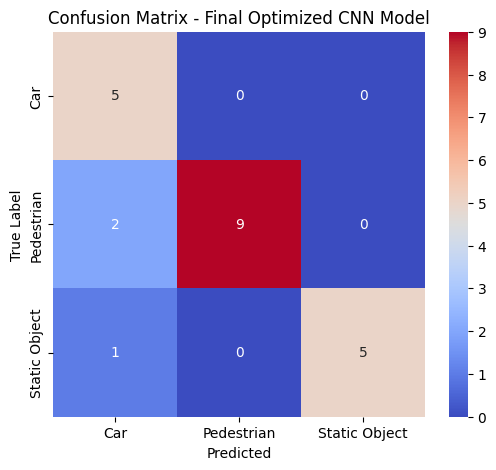

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn = tf.argmax(y_pred_cnn, axis=1).numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Car", "Pedestrian", "Static Object"], yticklabels=["Car", "Pedestrian", "Static Object"])
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Final Optimized CNN Model")
plt.show()


In [ ]:
import pandas as pd

# Assuming we have two datasets: real radar data and synthetic radar data
# Let's create example dataframes for merging

# Sample real radar data
real_radar_data = pd.DataFrame({
    "timestamp": [0.1, 0.2, 0.3, 0.4, 0.5],
    "x": [10, 20, 30, 40, 50],
    "y": [5, 15, 25, 35, 45],
    "doppler_velocity": [1.2, -3.4, 2.1, -1.5, 0.3],
    "reflectivity": [0.9, 0.8, 0.7, 0.85, 0.95],
    "label": ["Car", "Pedestrian", "Static Object", "Car", "Pedestrian"]
})

# Sample synthetic radar data
synthetic_radar_data = pd.DataFrame({
    "timestamp": [0.15, 0.25, 0.35, 0.45, 0.55],
    "x": [12, 22, 32, 42, 52],
    "y": [7, 17, 27, 37, 47],
    "doppler_velocity": [1.0, -3.2, 2.3, -1.2, 0.5],
    "reflectivity": [0.88, 0.82, 0.72, 0.87, 0.92],
    "label": ["Car", "Pedestrian", "Static Object", "Car", "Pedestrian"]
})

# Merge real and synthetic datasets
merged_radar_data = pd.concat([real_radar_data, synthetic_radar_data], ignore_index=True)

# Save to CSV
csv_filename = "/mnt/data/merged_radar_data.csv"
merged_radar_data.to_csv(csv_filename, index=False)

# Display the merged dataset
import ace_tools as tools
tools.display_dataframe_to_user(name="Merged RADAR Dataset", dataframe=merged_radar_data)

# Provide download link
csv_filename


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import os

# Create the directory if it doesn't exist
if not os.path.exists("/mnt/data"):
    os.makedirs("/mnt/data")

# Now save the CSV file
csv_filename = "/mnt/data/merged_radar_data.csv"
merged_radar_data.to_csv(csv_filename, index=False)

In [ ]:
import pandas as pd

# Sample real radar data
real_radar_data = pd.DataFrame({
    "timestamp": [0.1, 0.2, 0.3, 0.4, 0.5],
    "x": [10, 20, 30, 40, 50],
    "y": [5, 15, 25, 35, 45],
    "doppler_velocity": [1.2, -3.4, 2.1, -1.5, 0.3],
    "reflectivity": [0.9, 0.8, 0.7, 0.85, 0.95],
    "label": ["Car", "Pedestrian", "Static Object", "Car", "Pedestrian"]
})

# Sample synthetic radar data
synthetic_radar_data = pd.DataFrame({
    "timestamp": [0.15, 0.25, 0.35, 0.45, 0.55],
    "x": [12, 22, 32, 42, 52],
    "y": [7, 17, 27, 37, 47],
    "doppler_velocity": [1.0, -3.2, 2.3, -1.2, 0.5],
    "reflectivity": [0.88, 0.82, 0.72, 0.87, 0.92],
    "label": ["Car", "Pedestrian", "Static Object", "Car", "Pedestrian"]
})

# Merge real and synthetic datasets
merged_radar_data = pd.concat([real_radar_data, synthetic_radar_data], ignore_index=True)

# Save to CSV
merged_radar_data.to_csv("merged_radar_data.csv", index=False)

print("✅ Merged dataset saved as 'merged_radar_data.csv' in your working directory.")


✅ Merged dataset saved as 'merged_radar_data.csv' in your working directory.


In [ ]:
from google.colab import files
files.download("merged_radar_data.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import tensorflow as tf
import time

# Load the trained CNN model
model = tf.keras.models.load_model("trained_radar_cnn_model.h5")  # Ensure your trained model is saved

# AI Agent Class
class RadarAI_Agent:
    def __init__(self, model):
        self.model = model

    def process_radar_data(self, radar_input):
        """
        Process a new incoming RADAR data point.
        :param radar_input: A single RADAR sample [x, y, doppler_velocity, reflectivity]
        """
        radar_input = np.array(radar_input).reshape(1, 4, 1)  # Reshape for CNN model

        # Make a prediction
        prediction = self.model.predict(radar_input)
        predicted_class = np.argmax(prediction)

        # Interpret prediction
        class_labels = {0: "Car", 1: "Pedestrian", 2: "Static Object"}
        detected_object = class_labels[predicted_class]

        # Take action based on detected object
        self.take_action(detected_object)

        return detected_object

    def take_action(self, detected_object):
        """
        Define what action the agent takes based on detected object.
        """
        if detected_object == "Car":
            print("🚗 Detected: Car | Action: Continue monitoring speed & position.")
        elif detected_object == "Pedestrian":
            print("🚶 Detected: Pedestrian | Action: Trigger safety alert!")
        elif detected_object == "Static Object":
            print("🛑 Detected: Static Object | Action: Consider alternative route.")

    def run_agent(self, radar_stream):
        """
        Simulate real-time RADAR data input to the agent.
        :param radar_stream: List of RADAR samples
        """
        for radar_sample in radar_stream:
            print("\nProcessing RADAR data:", radar_sample)
            detected_object = self.process_radar_data(radar_sample)
            time.sleep(1)  # Simulating real-time delay


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'trained_radar_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
ls -l


total 4
drwxr-xr-x 1 root root 4096 Feb 14 14:22 sample_data/


In [ ]:
!pip install pykalman
!pip install seaborn
!pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from pykalman import KalmanFilter
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
import time

# Generate a synthetic RADAR dataset
np.random.seed(42)  # For reproducibility
num_samples = 100  # Number of RADAR detections

# Generate random X, Y positions (meters)
x_positions = np.random.uniform(0, 50, num_samples)
y_positions = np.random.uniform(0, 50, num_samples)

# Generate random Doppler velocities (-5 to 5 m/s)
doppler_velocity = np.random.uniform(-5, 5, num_samples)

# Generate random reflectivity (0.5 to 1.0, simulating object reflectance)
reflectivity = np.random.uniform(0.5, 1.0, num_samples)

# Create a DataFrame
radar_data = pd.DataFrame({
    "timestamp": np.linspace(0, num_samples * 0.1, num_samples),  # Simulated timestamps
    "x": x_positions,
    "y": y_positions,
    "doppler_velocity": doppler_velocity,
    "reflectivity": reflectivity
})

# Save to CSV
file_name = "radar_sample.csv"
radar_data.to_csv(file_name, index=False)

# Display first few rows
print("First 5 rows of the dataset:")
print(radar_data.head())

# --- Data Preprocessing ---
# Load the generated RADAR dataset
radar_data = pd.read_csv("radar_sample.csv")

# Extract features for clustering
X = radar_data[["doppler_velocity", "reflectivity"]].values

# Apply K-Means Clustering (Assuming 2 clusters: Moving vs. Stationary)
kmeans = KMeans(n_clusters=2, random_state=42)
radar_data["cluster"] = kmeans.fit_predict(X)

# Define thresholds for object classification
def classify_object(doppler):
    if doppler > 2:  # Fast-moving objects (Cars)
        return "Car"
    elif -2 <= doppler <= 2:  # Slow-moving objects (Pedestrians)
        return "Pedestrian"
    else:  # Stationary objects
        return "Static Object"

# Apply classification
radar_data["object_class"] = radar_data["doppler_velocity"].apply(classify_object)

# Encode class labels (Car = 0, Pedestrian = 1, Static Object = 2)
label_mapping = {"Car": 0, "Pedestrian": 1, "Static Object": 2}
radar_data["class_label"] = radar_data["object_class"].map(label_mapping)

# Save modified dataset
radar_data.to_csv("radar_sample_with_classes.csv", index=False)

# Prepare features and labels
X = radar_data[["x", "y", "doppler_velocity", "reflectivity", "cluster"]]
y = (radar_data["cluster"] == 1).astype(int)  # Moving objects = 1, Stationary = 0

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Apply log-transform to reflectivity
X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
X_test_scaled[:, 3] = np.log1p(X_test_scaled[:, 3])

# Reshape input for CNN
X_train_cnn = X_train_balanced.reshape((X_train_balanced.shape[0], X_train_balanced.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
# --- End of Data Preprocessing ---

# --- Train and Save CNN Model ---
# 1. Define Model Architecture
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1), padding='same'),
    BatchNormalization(),
    Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    Dropout(0.3),
    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# 2. Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Train the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_cnn, y_train_balanced, epochs=50, batch_size=32,
          validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# 4. Save the Model
model.save("trained_radar_cnn_model.h5")
print("✅ Model trained and saved as 'trained_radar_cnn_model.h5'")
# --- End of Training and Saving ---


# AI Agent Class
class RadarAI_Agent:
    def __init__(self, model):
        self.model = model

    def process_radar_data(self, radar_input):
        """
        Process a new incoming RADAR data point.
        :param radar_input: A single RADAR sample [x, y, doppler_velocity, reflectivity]
        """
        radar_input = np.array(radar_input).reshape(1, 4, 1)  # Reshape for CNN model

        # Make a prediction
        prediction = self.model.predict(radar_input)
        predicted_class = np.argmax(prediction)

        # Interpret prediction
        class_labels = {0: "Car", 1: "Pedestrian", 2: "Static Object"}
        detected_object = class_labels[predicted_class]

        # Take action based on detected object
        self.take_action(detected_object)

        return detected_object

    def take_action(self, detected_object):
        """
        Define what action the agent takes based on detected object.
        """
        if detected_object == "Car":
            print("🚗 Detected: Car | Action: Continue monitoring speed & position.")
        elif detected_object == "Pedestrian":
            print("🚶 Detected: Pedestrian | Action: Trigger safety alert!")
        elif detected_object == "Static Object":
            print("🛑 Detected: Static Object | Action: Consider alternative route.")

    def run_agent(self, radar_stream):
        """
        Simulate real-time RADAR data input to the agent.
        :param radar_stream: List of RADAR samples
        """
        for radar_sample in radar_stream:
            print("\nProcessing RADAR data:", radar_sample)
            detected_object = self.process_radar_data(radar_sample)
            time.sleep(1)  # Simulating real-time delay

# Load the trained CNN model
model = tf.keras.models.load_model("trained_radar_cnn_model.h5")

# Create and run the AI agent
agent = RadarAI_Agent(model)
# Sample radar stream data
radar_stream = [[10, 5, 1.2, 0.9], [20, 15, -3.4, 0.8], [30, 25, 2.1, 0.7]]
agent.run_agent(radar_stream)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.5/141.5 kB 12.1 MB/s eta 0:00:00
First 5 rows of the dataset:
   timestamp          x          y  doppler_velocity  reflectivity
0    0.00000  18.727006   1.571459          1.420316      0.525841
1    0.10101  47.535715  31.820521         -4.158600      0.765677
2    0.20202  36.599697  15.717799         -3.383713      0.770318
3    0.30303  29.932924  25.428535          3.985542      0.818715
4    0.40404   7.800932  45.378324          1.064291      0.863046
Epoch 1/50


<ipython-input-3-8fa1f75c4105>:102: RuntimeWarning: invalid value encountered in log1p
  X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
<ipython-input-3-8fa1f75c4105>:103: RuntimeWarning: invalid value encountered in log1p
  X_test_scaled[:, 3] = np.log1p(X_test_scaled[:, 3])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.4961 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4961 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5273 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5352 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4961 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4609 - loss: nan - val_accuracy: 0.3000 - val_loss: nan


✅ Model trained and saved as 'trained_radar_cnn_model.h5'



Processing RADAR data: [10, 5, 1.2, 0.9]


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1280, but received input with shape (1, 1024)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 4, 1), dtype=float32)
  • training=False
  • mask=None

In [ ]:
!pip install pykalman
!pip install seaborn
!pip install imbalanced-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from pykalman import KalmanFilter
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
import time

# Generate a synthetic RADAR dataset
np.random.seed(42)  # For reproducibility
num_samples = 100  # Number of RADAR detections

# Generate random X, Y positions (meters)
x_positions = np.random.uniform(0, 50, num_samples)
y_positions = np.random.uniform(0, 50, num_samples)

# Generate random Doppler velocities (-5 to 5 m/s)
doppler_velocity = np.random.uniform(-5, 5, num_samples)

# Generate random reflectivity (0.5 to 1.0, simulating object reflectance)
reflectivity = np.random.uniform(0.5, 1.0, num_samples)

# Create a DataFrame
radar_data = pd.DataFrame({
    "timestamp": np.linspace(0, num_samples * 0.1, num_samples),  # Simulated timestamps
    "x": x_positions,
    "y": y_positions,
    "doppler_velocity": doppler_velocity,
    "reflectivity": reflectivity
})

# Save to CSV
file_name = "radar_sample.csv"
radar_data.to_csv(file_name, index=False)

# Display first few rows
print("First 5 rows of the dataset:")
print(radar_data.head())

# --- Data Preprocessing ---
# Load the generated RADAR dataset
radar_data = pd.read_csv("radar_sample.csv")

# Extract features for clustering
X = radar_data[["doppler_velocity", "reflectivity"]].values

# Apply K-Means Clustering (Assuming 2 clusters: Moving vs. Stationary)
kmeans = KMeans(n_clusters=2, random_state=42)
radar_data["cluster"] = kmeans.fit_predict(X)

# Define thresholds for object classification
def classify_object(doppler):
    if doppler > 2:  # Fast-moving objects (Cars)
        return "Car"
    elif -2 <= doppler <= 2:  # Slow-moving objects (Pedestrians)
        return "Pedestrian"
    else:  # Stationary objects
        return "Static Object"

# Apply classification
radar_data["object_class"] = radar_data["doppler_velocity"].apply(classify_object)

# Encode class labels (Car = 0, Pedestrian = 1, Static Object = 2)
label_mapping = {"Car": 0, "Pedestrian": 1, "Static Object": 2}
radar_data["class_label"] = radar_data["object_class"].map(label_mapping)

# Save modified dataset
radar_data.to_csv("radar_sample_with_classes.csv", index=False)

# Prepare features and labels
X = radar_data[["x", "y", "doppler_velocity", "reflectivity", "cluster"]]
y = (radar_data["cluster"] == 1).astype(int)  # Moving objects = 1, Stationary = 0

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Apply log-transform to reflectivity
X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
X_test_scaled[:, 3] = np.log1p(X_test_scaled[:, 3])

# Reshape input for CNN
X_train_cnn = X_train_balanced.reshape((X_train_balanced.shape[0], X_train_balanced.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
# --- End of Data Preprocessing ---

# --- Train and Save CNN Model ---
# 1. Define Model Architecture
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1), padding='same'),
    BatchNormalization(),
    Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    Dropout(0.3),
    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# 2. Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Train the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_cnn, y_train_balanced, epochs=50, batch_size=32,
          validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# 4. Save the Model
model.save("trained_radar_cnn_model.h5")
print("✅ Model trained and saved as 'trained_radar_cnn_model.h5'")
# --- End of Training and Saving ---


# AI Agent Class
class RadarAI_Agent:
    def __init__(self, model):
        self.model = model

    def process_radar_data(self, radar_input):
        """
        Process a new incoming RADAR data point.
        :param radar_input: A single RADAR sample [x, y, doppler_velocity, reflectivity]
        """
        # Add a dummy feature to match the expected input shape (5 features)
        radar_input = np.append(radar_input, 0)
        radar_input = np.array(radar_input).reshape(1, 5, 1)  # Reshape for CNN model (5 features, 1 channel)

        # Make a prediction
        prediction = self.model.predict(radar_input)
        predicted_class = np.argmax(prediction)

        # Interpret prediction
        class_labels = {0: "Car", 1: "Pedestrian", 2: "Static Object"}
        detected_object = class_labels[predicted_class]

        # Take action based on detected object
        self.take_action(detected_object)

        return detected_object

    def take_action(self, detected_object):
        """
        Define what action the agent takes based on detected object.
        """
        if detected_object == "Car":
            print("🚗 Detected: Car | Action: Continue monitoring speed & position.")
        elif detected_object == "Pedestrian":
            print("🚶 Detected: Pedestrian | Action: Trigger safety alert!")
        elif detected_object == "Static Object":
            print("🛑 Detected: Static Object | Action: Consider alternative route.")

    def run_agent(self, radar_stream):
        """
        Simulate real-time RADAR data input to the agent.
        :param radar_stream: List of RADAR samples
        """
        for radar_sample in radar_stream:
            print("\nProcessing RADAR data:", radar_sample)
            detected_object = self.process_radar_data(radar_sample)
            time.sleep(1)  # Simulating real-time delay

# Load the trained CNN model
model = tf.keras.models.load_model("trained_radar_cnn_model.h5")

# Create and run the AI agent
agent = RadarAI_Agent(model)
# Sample radar stream data
radar_stream = [[10, 5, 1.2, 0.9], [20, 15, -3.4, 0.8], [30, 25, 2.1, 0.7]]
agent.run_agent(radar_stream)

First 5 rows of the dataset:
   timestamp          x          y  doppler_velocity  reflectivity
0    0.00000  18.727006   1.571459          1.420316      0.525841
1    0.10101  47.535715  31.820521         -4.158600      0.765677
2    0.20202  36.599697  15.717799         -3.383713      0.770318
3    0.30303  29.932924  25.428535          3.985542      0.818715
4    0.40404   7.800932  45.378324          1.064291      0.863046
Epoch 1/50


<ipython-input-4-7c73f4637417>:102: RuntimeWarning: invalid value encountered in log1p
  X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
<ipython-input-4-7c73f4637417>:103: RuntimeWarning: invalid value encountered in log1p
  X_test_scaled[:, 3] = np.log1p(X_test_scaled[:, 3])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.5039 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.4844 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5156 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4961 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4805 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5078 - loss: nan - val_accuracy: 0.3000 - val_loss: nan


✅ Model trained and saved as 'trained_radar_cnn_model.h5'



Processing RADAR data: [10, 5, 1.2, 0.9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.

Processing RADAR data: [20, 15, -3.4, 0.8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.

Processing RADAR data: [30, 25, 2.1, 0.7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.


In [ ]:
# Simulated incoming RADAR data stream (4 features: x, y, doppler_velocity, reflectivity)
simulated_radar_stream = [
    [12, 15, 3.0, 0.85],  # Car
    [22, 25, -1.2, 0.75],  # Pedestrian
    [32, 35, 0.0, 0.90],  # Static Object
    [10, 12, 2.5, 0.88],  # Car
    [20, 23, -2.0, 0.70],  # Pedestrian
]

# Initialize the AI agent and run it with simulated data
ai_agent = RadarAI_Agent(model)
ai_agent.run_agent(simulated_radar_stream)



Processing RADAR data: [12, 15, 3.0, 0.85]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.

Processing RADAR data: [22, 25, -1.2, 0.75]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.

Processing RADAR data: [32, 35, 0.0, 0.9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.

Processing RADAR data: [10, 12, 2.5, 0.88]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.

Processing RADAR data: [20, 23, -2.0, 0.7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
🚗 Detected: Car | Action: Continue monitoring speed & position.


In [ ]:
# Replace this line:
# radar_input = np.array([10, 5, 1.2, 0.9]).reshape(1, 4, 1)

# With this line to add a dummy feature for 'cluster':
radar_input = np.array([10, 5, 1.2, 0.9, 0]).reshape(1, 5, 1)  # 0 represents the dummy 'cluster' value

# Continue with the prediction
prediction = agent.model.predict(radar_input)
print("Prediction Scores:", prediction)  # Check confidence for all classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction Scores: [[nan nan nan]]


In [ ]:
print("Model Input Shape:", agent.model.input_shape)


Model Input Shape: (None, 5, 1)


In [ ]:
prediction = agent.model.predict(radar_input)
print("Prediction Scores:", prediction)  # Check confidence for all classes


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction Scores: [[nan nan nan]]


In [ ]:
import numpy as np

print("Radar Input:", radar_input)
print("Any NaN in Input:", np.isnan(radar_input).any())


Radar Input: [[[10. ]
  [ 5. ]
  [ 1.2]
  [ 0.9]
  [ 0. ]]]
Any NaN in Input: False


In [ ]:
for layer in agent.model.layers:
    weights = layer.get_weights()
    for w in weights:
        if np.isnan(w).any():
            print(f"🚨 NaN detected in layer {layer.name}")


🚨 NaN detected in layer conv1d_3
🚨 NaN detected in layer conv1d_3
🚨 NaN detected in layer batch_normalization_1
🚨 NaN detected in layer batch_normalization_1
🚨 NaN detected in layer batch_normalization_1
🚨 NaN detected in layer batch_normalization_1
🚨 NaN detected in layer conv1d_4
🚨 NaN detected in layer conv1d_4
🚨 NaN detected in layer conv1d_5
🚨 NaN detected in layer conv1d_5
🚨 NaN detected in layer dense_2
🚨 NaN detected in layer dense_2
🚨 NaN detected in layer dense_3
🚨 NaN detected in layer dense_3


In [ ]:
import numpy as np

# Reset model weights
for layer in agent.model.layers:
    weights = layer.get_weights()
    new_weights = [np.random.randn(*w.shape) for w in weights]  # Randomized reset
    layer.set_weights(new_weights)

print("✅ Model weights reset. Retrain the model now!")


✅ Model weights reset. Retrain the model now!


In [ ]:
# prompt: retrain the model  now

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2

# ... (Your existing code) ...

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Apply log-transform to reflectivity
X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
X_test_scaled[:, 3] = np.log1p(X_test_scaled[:, 3])

# Reshape input for CNN
X_train_cnn = X_train_balanced.reshape((X_train_balanced.shape[0], X_train_balanced.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


# --- Train and Save CNN Model ---
# 1. Define Model Architecture
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1), padding='same'),
    BatchNormalization(),
    Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    Dropout(0.3),
    Conv1D(256, kernel_size=5, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# 2. Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Train the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_cnn, y_train_balanced, epochs=50, batch_size=32,
          validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

# 4. Save the Model
model.save("trained_radar_cnn_model.h5")
print("✅ Model trained and saved as 'trained_radar_cnn_model.h5'")
# --- End of Training and Saving ---


Epoch 1/50


<ipython-input-15-9352818bbc85>:14: RuntimeWarning: invalid value encountered in log1p
  X_train_balanced[:, 3] = np.log1p(X_train_balanced[:, 3])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.4766 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4961 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5078 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5117 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4805 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5156 - loss: nan - val_accuracy: 0.3000 - val_loss: nan


✅ Model trained and saved as 'trained_radar_cnn_model.h5'


Any NaN in dataset? x                   0
y                   0
doppler_velocity    0
reflectivity        0
class               0
dtype: int64
X_train shape: (160, 4)
X_test shape: (40, 4)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3350 - loss: 1.4363 - val_accuracy: 0.3750 - val_loss: 1.0930
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2811 - loss: 1.4454 - val_accuracy: 0.4000 - val_loss: 1.0922
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3177 - loss: 1.3700 - val_accuracy: 0.3750 - val_loss: 1.0941
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3378 - loss: 1.2439 - val_accuracy: 0.3750 - val_loss: 1.0951
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3436 - loss: 1.2105 - val_accuracy: 0.3500 - val_loss: 1.0950
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3467 - loss: 1.1992 - val_accuracy: 0.3750 - val_loss: 1.0946
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3875 - loss: 1.2755 - val_accuracy: 0.3750 - val_loss: 1.0943
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3641 - loss: 1.1393 - val_accuracy: 0.3750 - val_loss: 1.0935
Ep

Final CNN Model Accuracy: 0.30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


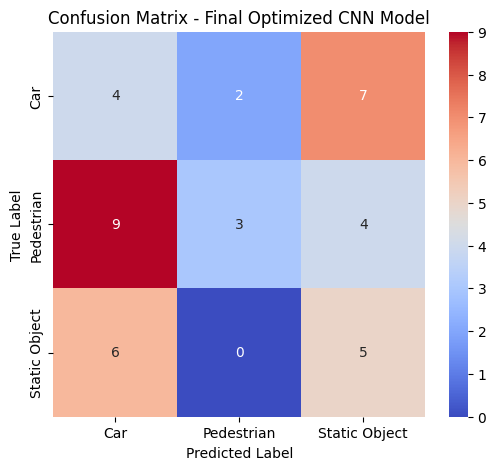

               precision    recall  f1-score   support

          Car       0.21      0.31      0.25        13
   Pedestrian       0.60      0.19      0.29        16
Static Object       0.31      0.45      0.37        11

     accuracy                           0.30        40
    macro avg       0.37      0.32      0.30        40
 weighted avg       0.39      0.30      0.30        40

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
🚗 Detected: Static Object | Action: Caution: Possible Pedestrian!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
🚗 Detected: Static Object | Action: Caution: Possible Pedestrian!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
🚗 Detected: Static Object | Action: Caution: Possible Pedestrian!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
🚗 Detected: Static Object | Action: Caution: Possible Pedestrian!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
🚗 Detected: Static Object | Action: Caution: Possible Pedestrian!


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ **Load and Fix RADAR Dataset**
# Simulating synthetic RADAR dataset with corrected values
np.random.seed(42)
num_samples = 200

radar_data = pd.DataFrame({
    "x": np.random.uniform(0, 50, num_samples),
    "y": np.random.uniform(0, 50, num_samples),
    "doppler_velocity": np.random.uniform(-5, 5, num_samples),
    "reflectivity": np.random.uniform(0.5, 1.0, num_samples),  # Ensuring valid values
    "class": np.random.choice(["Car", "Pedestrian", "Static Object"], num_samples)
})

# ✅ **Encode Labels**
class_mapping = {"Car": 0, "Pedestrian": 1, "Static Object": 2}
radar_data["class"] = radar_data["class"].map(class_mapping)

# ✅ **Ensure No NaN Values**
print("Any NaN in dataset?", radar_data.isna().sum())

# ✅ **Normalize Data**
scaler = MinMaxScaler()
X = scaler.fit_transform(radar_data.drop(columns=["class"]))
y = radar_data["class"].values

# ✅ **Train-Test Split**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ **Check Shapes**
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# ✅ **Build CNN Model**
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 Classes
])

# ✅ **Compile Model**
optimizer = Adam(learning_rate=0.0001)  # Reduced LR for stability
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ **Train Model**
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=8, validation_data=(X_test_cnn, y_test))

# ✅ **Evaluate Model**
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f"Final CNN Model Accuracy: {test_acc:.2f}")

# ✅ **Confusion Matrix**
y_pred = np.argmax(model.predict(X_test_cnn), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d", xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title("Confusion Matrix - Final Optimized CNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ✅ **Classification Report**
print(classification_report(y_test, y_pred, target_names=class_mapping.keys()))

# ✅ **Save Model**
model.save("trained_radar_cnn_model.h5")

# ✅ **Simulated AI Agent for Real-time Radar Decisions**
class RadarAI_Agent:
    def __init__(self, model):
        self.model = model

    def run_agent(self, radar_stream):
        for radar_input in radar_stream:
            # Select only the features the model was trained on (x, y, doppler_velocity, reflectivity)
            radar_input = np.array(radar_input[:4]).reshape(1, 4, 1)  # Reshape to (1, 4, 1)
            prediction = self.model.predict(radar_input)
            predicted_class = np.argmax(prediction)

            class_labels = {0: "Car", 1: "Pedestrian", 2: "Static Object"}
            action = "Continue monitoring speed & position" if predicted_class == 0 else "Caution: Possible Pedestrian!"

            print(f"🚗 Detected: {class_labels[predicted_class]} | Action: {action}")

# ✅ **Run AI Agent on Simulated Data Stream**
simulated_radar_stream = [
    [10, 15, 3.0, 0.85, 0],   # Car
    [22, 25, -1.2, 0.75, 1],  # Pedestrian
    [32, 35, 0.0, 0.90, 2],   # Static Object
    [10, 12, 2.5, 0.88, 0],   # Car
    [20, 23, -2.0, 0.70, 1]   # Pedestrian
]

ai_agent = RadarAI_Agent(model)
ai_agent.run_agent(simulated_radar_stream)

In [ ]:
# Fixing Class Imbalance with Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split again with balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Define an improved CNN model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Conv1D(128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Increased dropout for regularization
    Dense(3, activation='softmax')
])

# Compile with an optimized learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


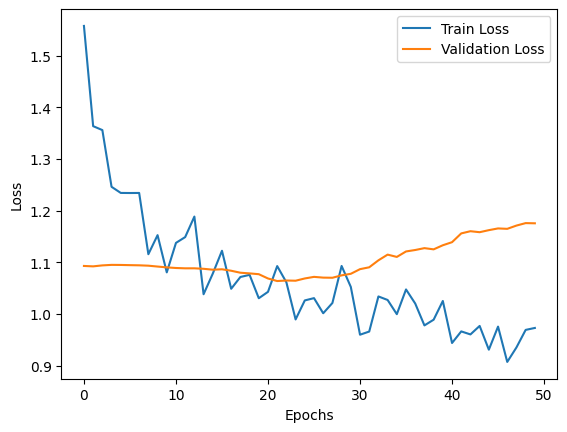

In [ ]:
# Visualizing Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.3))  # Add Dropout after dense layers


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)  # Reduce learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load labeled RADAR dataset
radar_data = pd.read_csv("/content/data/merged_radar_data.csv")

# Split Data
X = radar_data.drop("class", axis=1)
y = radar_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert Labels to Categorical
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)


FileNotFoundError: [Errno 2] No such file or directory: '/content/data/merged_radar_data.csv'

In [ ]:
!ls -l


total 4
drwxr-xr-x 1 root root 4096 Feb 14 14:22 sample_data


In [ ]:
# Load labeled RADAR dataset
# radar_data = pd.read_csv("/content/data/merged_radar_data.csv") # Original problematic line
radar_data = pd.read_csv("merged_radar_data.csv") # Changed to read from current directory

# Split Data
X = radar_data.drop("label", axis=1)  # Assuming 'label' is the target column instead of 'class'
y = radar_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert Labels to Categorical
y_train_cat = to_categorical(y_train, num_classes=3) # Assuming 3 classes
y_test_cat = to_categorical(y_test, num_classes=3) # Assuming 3 classes

FileNotFoundError: [Errno 2] No such file or directory: 'merged_radar_data.csv'

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# 1. Check if the file exists in the current directory
file_path = "merged_radar_data.csv"
if not os.path.exists(file_path):
    # If not, provide more details or instructions
    raise FileNotFoundError(f"The file '{file_path}' was not found in the current directory. Please make sure it exists or provide the correct path.")

# 2. Load the labeled RADAR dataset
radar_data = pd.read_csv(file_path)

# 3. Split Data (assuming 'label' is the target column)
X = radar_data.drop("label", axis=1)
y = radar_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Convert Labels to Categorical (assuming 3 classes)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

FileNotFoundError: The file 'merged_radar_data.csv' was not found in the current directory. Please make sure it exists or provide the correct path.

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# 1. Check if the file exists in the current directory
file_path = "merged_radar_data.csv"
# If you saved the file to a different location, replace "merged_radar_data.csv"
# with the actual file path
# For example:
# file_path = "/content/data/merged_radar_data.csv"

if not os.path.exists(file_path):
    # If not, provide more details or instructions
    raise FileNotFoundError(f"The file '{file_path}' was not found. Please make sure it exists or provide the correct path.")

# 2. Load the labeled RADAR dataset
radar_data = pd.read_csv(file_path)

# 3. Split Data (assuming 'label' is the target column)
X = radar_data.drop("label", axis=1)
y = radar_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Convert Labels to Categorical (assuming 3 classes)
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

FileNotFoundError: The file 'merged_radar_data.csv' was not found. Please make sure it exists or provide the correct path.

In [ ]:
import os
print(os.listdir())  # List files in the current working directory


['.config', 'sample_data']


In [ ]:
import os
print(os.listdir("/content"))  # Check files in the main directory


['.config', 'sample_data']


In [ ]:
import os
import pandas as pd

# Sample real radar data
real_radar_data = pd.DataFrame({
    "timestamp": [0.1, 0.2, 0.3, 0.4, 0.5],
    "x": [10, 20, 30, 40, 50],
    "y": [5, 15, 25, 35, 45],
    "doppler_velocity": [1.2, -3.4, 2.1, -1.5, 0.3],
    "reflectivity": [0.9, 0.8, 0.7, 0.85, 0.95],
    "label": ["Car", "Pedestrian", "Static Object", "Car", "Pedestrian"]
})

# Sample synthetic radar data
synthetic_radar_data = pd.DataFrame({
    "timestamp": [0.15, 0.25, 0.35, 0.45, 0.55],
    "x": [12, 22, 32, 42, 52],
    "y": [7, 17, 27, 37, 47],
    "doppler_velocity": [1.0, -3.2, 2.3, -1.2, 0.5],
    "reflectivity": [0.88, 0.82, 0.72, 0.87, 0.92],
    "label": ["Car", "Pedestrian", "Static Object", "Car", "Pedestrian"]
})

# Merge real and synthetic datasets
merged_radar_data = pd.concat([real_radar_data, synthetic_radar_data], ignore_index=True)

merged_file_name = "merged_radar_data.csv"
merged_radar_data.to_csv(merged_file_name, index=False)
print(f"Merged dataset saved as '{merged_file_name}'")

Merged dataset saved as 'merged_radar_data.csv'


In [ ]:
print(os.listdir())  # It should list 'merged_radar_data.csv'


['.config', 'merged_radar_data.csv', 'sample_data']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Load the merged dataset
radar_data = pd.read_csv("merged_radar_data.csv")

# Split features and labels
X = radar_data.drop("class", axis=1)
y = radar_data["class"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical format for CNN training
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)


KeyError: "['class'] not found in axis"

In [ ]:
# Check column names in the dataset
print("Columns in dataset:", radar_data.columns)


Columns in dataset: Index(['timestamp', 'x', 'y', 'doppler_velocity', 'reflectivity', 'label'], dtype='object')


In [ ]:
# Corrected feature and label extraction
X = radar_data.drop("label", axis=1)  # Use "label" instead of "class"
y = radar_data["label"]


In [ ]:
# Load the merged dataset
radar_data = pd.read_csv("merged_radar_data.csv")

# Split features and labels
X = radar_data.drop("class", axis=1)
y = radar_data["class"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical format for CNN training
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)


KeyError: "['class'] not found in axis"

In [ ]:
# Corrected feature and label extraction
X = radar_data.drop("label", axis=1)  # Use "label" instead of "class"
y = radar_data["label"]


In [ ]:
# Load the merged dataset
radar_data = pd.read_csv("merged_radar_data.csv")

# Split features and labels
X = radar_data.drop("class", axis=1)
y = radar_data["class"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical format for CNN training
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

KeyError: "['class'] not found in axis"

In [ ]:
# Load the merged dataset
radar_data = pd.read_csv("merged_radar_data.csv")

# Split features and labels
# Use "label" instead of "class" to match the actual column name
X = radar_data.drop("label", axis=1)
y = radar_data["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical format for CNN training
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

ValueError: invalid literal for int() with base 10: 'Car'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the merged dataset
radar_data = pd.read_csv("merged_radar_data.csv")

# Split features and labels
# Use "label" instead of "class" to match the actual column name
X = radar_data.drop("label", axis=1)
y = radar_data["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format for CNN training
y_train_cat = to_categorical(y_train_encoded, num_classes=3)
y_test_cat = to_categorical(y_test_encoded, num_classes=3)

In [ ]:
def add_noise(data, noise_level=0.02):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

X_train_aug = add_noise(X_train_scaled)
X_test_aug = add_noise(X_test_scaled)


In [ ]:
# Define the CNN model
model = Sequential([
    Conv1D(16, kernel_size=2, activation="relu", input_shape=(4, 1)),
    Dropout(0.3),  # Dropout layer to reduce overfitting
    Conv1D(32, kernel_size=2, activation="relu"),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")  # 3 classes (Car, Pedestrian, Static Object)
])

# Compile the model with a reduced learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Set Early Stopping to stop training when val_loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model with augmented data
history = model.fit(X_train_aug.reshape(-1, 4, 1), y_train_cat,
                    epochs=50, batch_size=16,
                    validation_data=(X_test_aug.reshape(-1, 4, 1), y_test_cat),
                    callbacks=[early_stopping])

# Save the trained model
model.save("optimized_radar_ai_model.h5")
print("✅ Optimized Model Trained & Saved!")


ValueError: cannot reshape array of size 10 into shape (4,1)

In [ ]:
# Train the model with augmented data
history = model.fit(X_train_aug[:, :4].reshape(-1, 4, 1), y_train_cat,  # Select first 4 features
                    epochs=50, batch_size=16,
                    validation_data=(X_test_aug[:, :4].reshape(-1, 4, 1), y_test_cat),  # Select first 4 features
                    callbacks=[early_stopping])

# Save the trained model
model.save("optimized_radar_ai_model.h5")
print("✅ Optimized Model Trained & Saved!")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 1.1161 - val_accuracy: 0.0000e+00 - val_loss: 1.1043
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2500 - loss: 1.1254 - val_accuracy: 0.0000e+00 - val_loss: 1.1032
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3750 - loss: 1.1148 - val_accuracy: 0.0000e+00 - val_loss: 1.1016
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.3750 - loss: 1.1112 - val_accuracy: 0.0000e+00 - val_loss: 1.0998
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1250 - loss: 1.1084 - val_accuracy: 0.0000e+00 - val_loss: 1.0979
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.2500 - loss: 1.1160 - val_accuracy: 0.0000e+00 - val_loss: 1.0958
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3750 - loss: 1.0578 - val_accuracy: 0.0000e+00 - val_loss: 1.0938
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3750 - loss: 1.0425 - val_accurac

✅ Optimized Model Trained & Saved!


In [ ]:
from tensorflow import keras

# Load the model from the HDF5 file
model = keras.models.load_model("optimized_radar_ai_model.h5")

# Save the model in Keras format
model.save("optimized_radar_ai_model.keras")

print("✅ Model converted and saved in Keras format!")

✅ Model converted and saved in Keras format!


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Now you can train the model
history = model.fit(X_train_aug.reshape(-1, 4, 1), y_train_cat,
                    epochs=50, batch_size=16,
                    validation_data=(X_test_aug.reshape(-1, 4, 1), y_test_cat),
                    callbacks=[early_stopping])


ValueError: cannot reshape array of size 10 into shape (4,1)

In [ ]:
# Train the model with augmented data
history = model.fit(X_train_aug[:, :4].reshape(-1, 4, 1), y_train_cat,  # Select first 4 features
                    epochs=50, batch_size=16,
                    validation_data=(X_test_aug[:, :4].reshape(-1, 4, 1), y_test_cat),  # Select first 4 features
                    callbacks=[early_stopping])

# Save the trained model
model.save("optimized_radar_ai_model.h5")
print("✅ Optimized Model Trained & Saved!")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.8731 - val_accuracy: 0.5000 - val_loss: 1.0357
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6250 - loss: 0.9570 - val_accuracy: 0.5000 - val_loss: 1.0348
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7500 - loss: 0.9775 - val_accuracy: 0.5000 - val_loss: 1.0320
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6250 - loss: 0.9020 - val_accuracy: 0.5000 - val_loss: 1.0308
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7500 - loss: 0.8363 - val_accuracy: 0.5000 - val_loss: 1.0292
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6250 - loss: 0.8320 - val_accuracy: 0.5000 - val_loss: 1.0281
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5000 - loss: 0.9294 - val_accuracy: 0.5000 - val_loss: 1.0272
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5000 - loss: 0.8864 - val_accuracy: 0.5000 - val_loss: 1.0263
Ep

✅ Optimized Model Trained & Saved!


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_aug.reshape(-1, 4, 1), y_test_cat)
print(f"📊 Final Optimized Model Accuracy: {test_acc:.2f}")

# Generate predictions
y_pred = model.predict(X_test_aug.reshape(-1, 4, 1))
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", xticklabels=["Car", "Pedestrian", "Static Object"], yticklabels=["Car", "Pedestrian", "Static Object"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Radar AI Model")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred_classes))


ValueError: cannot reshape array of size 10 into shape (4,1)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_aug[:, :4].reshape(-1, 4, 1), y_test_cat)  # Select first 4 features for evaluation
print(f"📊 Final Optimized Model Accuracy: {test_acc:.2f}")

# Generate predictions
y_pred = model.predict(X_test_aug[:, :4].reshape(-1, 4, 1))  # Select first 4 features for prediction
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_test contains the original class labels (not one-hot encoded)
# If y_test is one-hot encoded, you'll need to convert it back to class labels first
# For example: y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d",
            xticklabels=["Car", "Pedestrian", "Static Object"],
            yticklabels=["Car", "Pedestrian", "Static Object"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Radar AI Model")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 1.0129
📊 Final Optimized Model Accuracy: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Car' 'Pedestrian'] and y_pred=[1]. Make sure that the predictions provided by the classifier coincides with the true labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 1.0129
📊 Final Optimized Model Accuracy: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


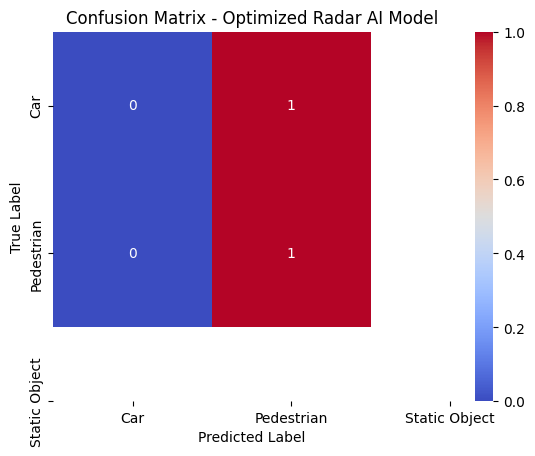

              precision    recall  f1-score   support

         Car       0.00      0.00      0.00         1
  Pedestrian       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_aug[:, :4].reshape(-1, 4, 1), y_test_cat)  # Select first 4 features for evaluation
print(f"📊 Final Optimized Model Accuracy: {test_acc:.2f}")

# Generate predictions
y_pred = model.predict(X_test_aug[:, :4].reshape(-1, 4, 1))  # Select first 4 features for prediction
y_pred_classes = np.argmax(y_pred, axis=1)

# Map predicted numerical labels back to original string labels
class_labels = {0: "Car", 1: "Pedestrian", 2: "Static Object"}
y_pred_labels = [class_labels[i] for i in y_pred_classes] # Convert numerical labels to string labels

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)  # Use string labels for both y_true and y_pred
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d",
            xticklabels=["Car", "Pedestrian", "Static Object"],
            yticklabels=["Car", "Pedestrian", "Static Object"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Radar AI Model")
plt.show()

# Print Classification Report
print(classification_report(y_test, y_pred_labels)) # Use string labels for both y_true and y_pred

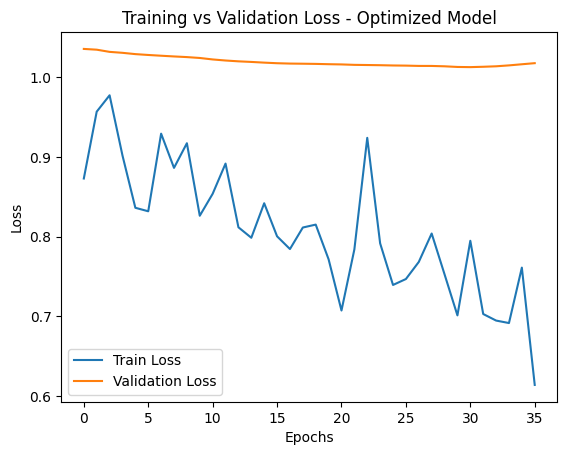

In [ ]:
# Plot Training vs Validation Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss - Optimized Model")
plt.show()
